In [1]:
import cv2
import pandas as pd
from matplotlib import pyplot as plt
import random
from detectron2.utils.file_io import PathManager
import xml.etree.ElementTree as ET
%matplotlib inline

/nfs/stak/users/omorim/hpc-share/omorim/miniconda3/envs/detrex/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Randomly sample 10 images, and output the predictions, along with the labels as known/unknown

Read in predictions from csv file, and also the annotations, then put them on the images

In [ ]:
df = pd.read_csv("predictions/agnostic_edges_test_predictions.csv", dtype={"ids":"str"})

In [ ]:
df.head()

In [78]:
s = set(df["ids"].values)

In [139]:
VOC_CLASS_NAMES = [
"aeroplane", "bicycle", "bird", "boat", "bottle", "bus", "car", "cat",
"chair", "cow", "diningtable", "dog", "horse", "motorbike", "person",
"pottedplant", "sheep", "sofa", "train", "tvmonitor"
]

In [127]:
random.seed(0)
r = random.sample(s, 10)
r

['000000280779',
 '000000160556',
 '009806',
 '000000341973',
 '000000013659',
 '000000081988',
 '003448',
 '008113',
 '009265',
 '000000148957']

In [125]:
def parse_rec(filename):
    """Parse a PASCAL VOC xml file."""
    with PathManager.open(filename) as f:
        tree = ET.parse(f)
    objects = []
    for obj in tree.findall("object"):
        obj_struct = {}
        obj_struct["name"] = obj.find("name").text
        # This causes problems, because coco doesn't have pose annotations possibly
        #obj_struct["pose"] = obj.find("pose").text
        #obj_struct["truncated"] = int(obj.find("truncated").text)
        obj_struct["difficult"] = int(obj.find("difficult").text)
        bbox = obj.find("bndbox")
        obj_struct["bbox"] = [
            int(bbox.find("xmin").text),
            int(bbox.find("ymin").text),
            int(bbox.find("xmax").text),
            int(bbox.find("ymax").text),
        ]
        objects.append(obj_struct)

    return objects

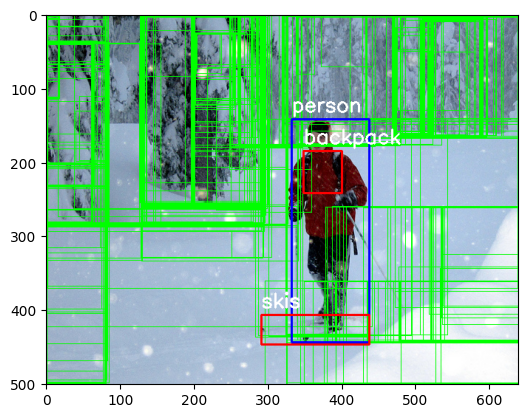

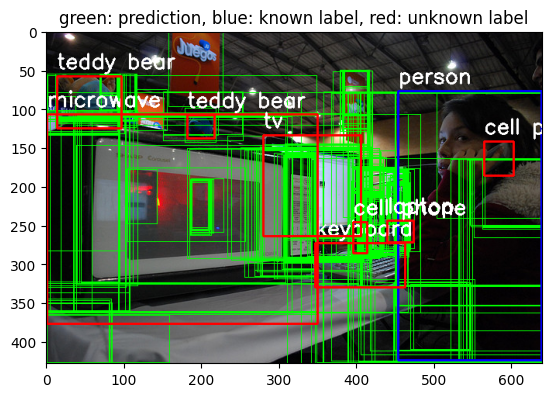

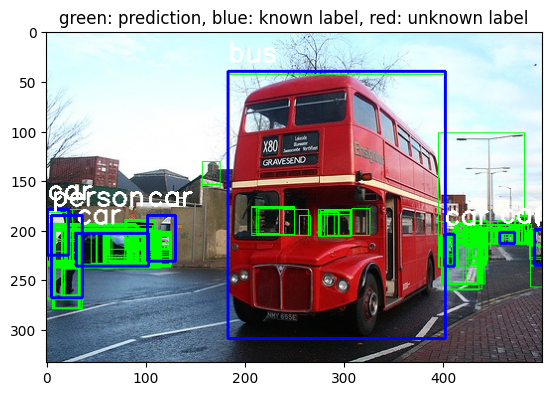

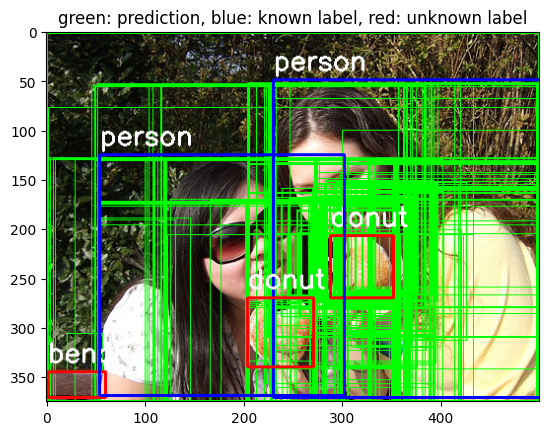

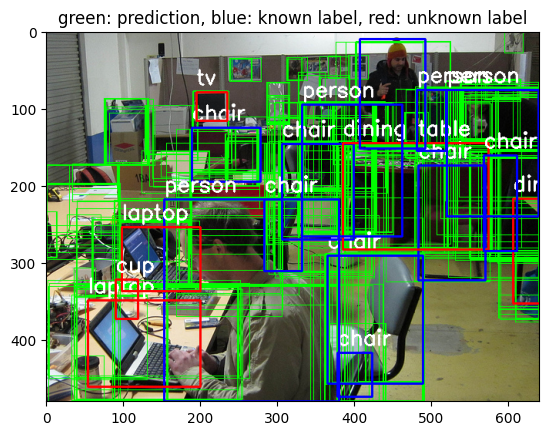

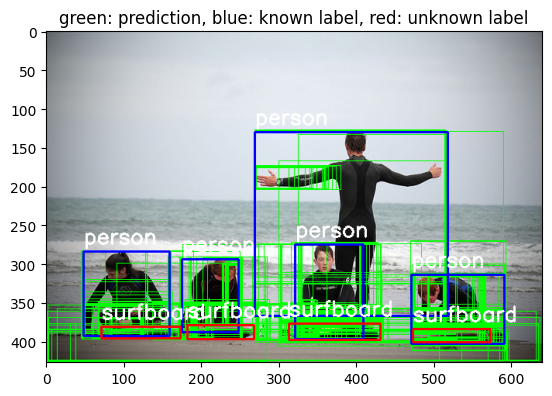

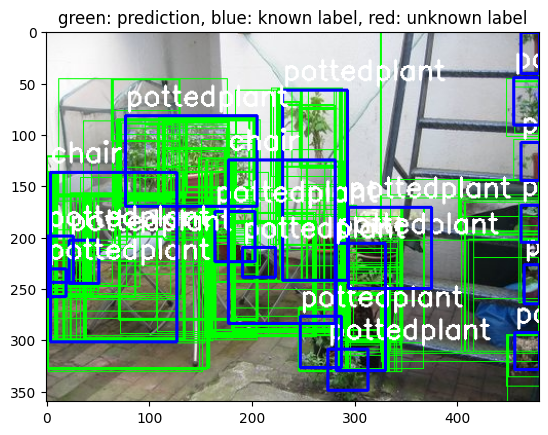

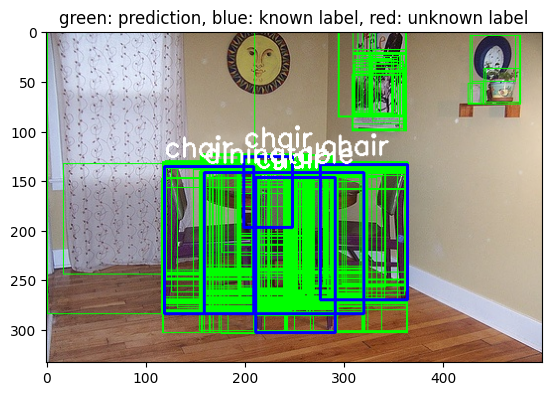

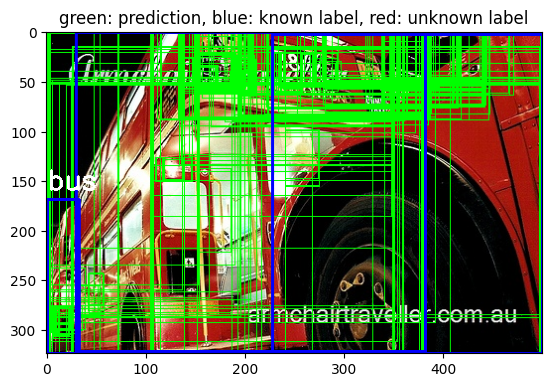

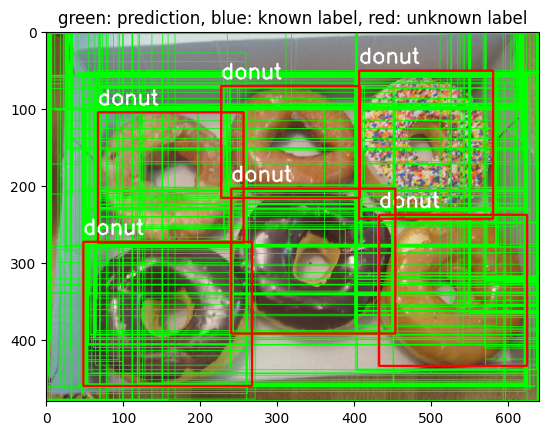

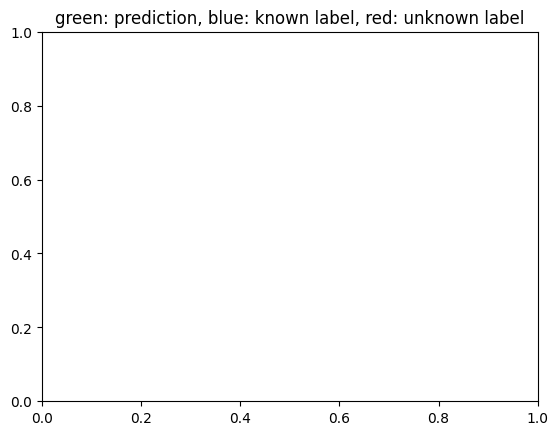

In [154]:
for i in range(len(r)):
    new_df = df.loc[df['ids'] == r[i]]
    path = "../PROB/data/VOC2007/JPEGImages/{}.jpg".format(new_df["ids"].values[0])
    an_path = "../PROB/data/VOC2007/Annotations/{}.xml".format(new_df["ids"].values[0])
    o = parse_rec(an_path)
    image = cv2.imread(path)
    new_df.sort_values(by='probs', ascending=False)
    total = 0
    for index, row in new_df.iterrows():
        total += 1
        new_image = image
        start = (int(row["xmin"]), int(row["ymin"]))
        end = (int(row["xmax"]), int(row["ymax"]))
        new_image = cv2.rectangle(image, start, end, color=(0,255,0), thickness=1)
        # if total == 100:
        #     break
    for object in o:
        start = (object["bbox"][0], object["bbox"][1])
        end = (object["bbox"][2], object["bbox"][3])
        co = (0, 0, 255)
        if object["name"] in VOC_CLASS_NAMES:
            co = (255, 0, 0)
        new_image = cv2.rectangle(image, start, end, color=co, thickness=2)
        cv2.putText(image, object["name"], (start[0], start[1]-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255,255,255), 2)
    image_rgb = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.show()
    plt.title("green: prediction, blue: known label, red: unknown label")

Only 9119 image ids? Some rows have 300 predictions for an imageid, some have 600??

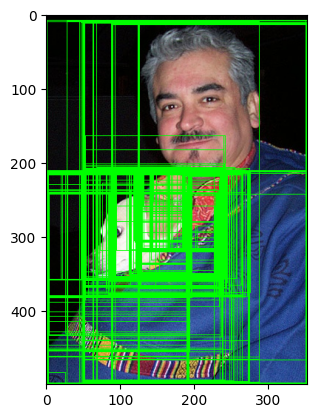

In [100]:
path = "../PROB/data/VOC2007/JPEGImages/000001.jpg"
image = cv2.imread(path)
new_image = image
for i in range(300):
    start = (int(df["xmin"][i]), int(df["ymin"][i]))
    end = (int(df["xmax"][i]), int(df["ymax"][i]))
    new_image = cv2.rectangle(image, start, end, color=(0,255,0), thickness=1)
image_rgb = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()